# Combining dataframes and scraping Canadian weather data

## Install

In [1]:
SYFT_VERSION = ">=0.8.1b0,<0.9"
package_string = f'"syft{SYFT_VERSION}"'
# !pip install {package_string} -f https://whls.blob.core.windows.net/unstable/index.html -q

In [2]:
import syft as sy
sy.requires(SYFT_VERSION)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/PySyft


✅ The installed version of syft==0.8.1b2 matches the requirement >=0.8.1b0 and the requirement <0.9


In [3]:
node = sy.orchestra.launch(name="pandas-test-domain-5", port=8080, reset=True)

Starting pandas-test-domain-5 server on 0.0.0.0:8080
SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7675ef0eb0f1449f9eb224ea0a4e6d45.sqlite



# Data owner: upload dataset

In [4]:
root_domain_client = node.login(email="info@openmined.org", password="changethis")

## Load data

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [6]:
from datetime import timedelta
import random
from dateutil.parser import parse
from pandas._libs.tslibs.timestamps import Timestamp
from syft.service.project.project import Project
from syft.util.util import autocache, PANDAS_DATA

<AxesSubplot: xlabel='Date/Time'>

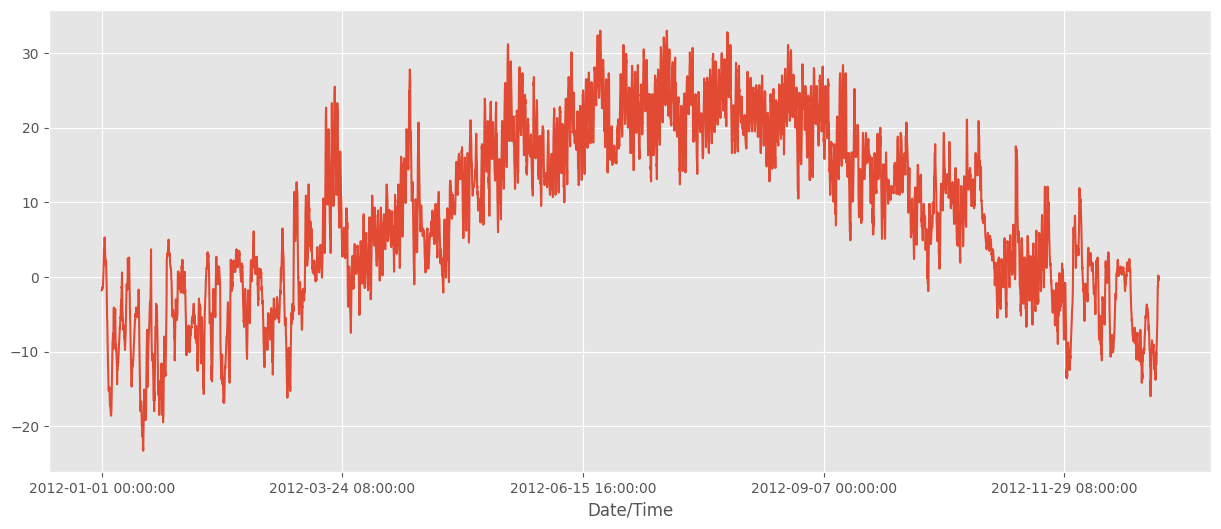

In [7]:
weather_2012_final = pd.read_csv(autocache(f"{PANDAS_DATA}/weather_2012.csv"), index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## Create mock data

Instead, we upload our dataset per month as a starting point

In [8]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit"

In [9]:
weather_types = set(weather_2012_final.Weather.to_list())

In [10]:
def get_mock_date(i):
    return str(parse('Jun 1 2010') + timedelta(days=i))

def get_mock_row(i):
    res = dict()
    for k, function in mock_functions.items():
        res[k] = function()
    return res
    

In [11]:
mock_functions = {
    "Temp (°C)": lambda: random.uniform(-10, 40),
    "Dew Point Temp (C)": lambda: random.uniform(-10, 10),
    "Rel Hum (%)": lambda: random.randint(50, 100),
    "Wind Spd (km/h)": lambda: random.randint(1, 30),
    'Visibility (km)': lambda: random.uniform(0.5, 40),
    'Stn Press (kPa)': lambda: random.uniform(50, 100),
    'Weather': lambda: random.choice(list(weather_types))
}

In [12]:
assets = []
for month in range(1, 13):
    url = url_template.format(month=month, year=2012)
    weather = pd.read_csv(url, parse_dates=True, index_col='Date/Time (LST)')
    mock = pd.DataFrame(index=[Timestamp(get_mock_date(i)) for i in range(len(weather))],
                    data=[get_mock_row(i) for i in range(len(weather))],
                    columns=weather.columns)
    
    assets += [sy.Asset(name=f"weather{month}", data=weather, mock=mock, mock_is_real=False)]

Upload the data

In [13]:
dataset = sy.Dataset(name="test", asset_list=assets)
root_domain_client.upload_dataset(dataset)

  8%|████████▋                                                                                               | 1/12 [00:00<00:01,  7.25it/s]

Uploading: weather1
Uploading: weather2


 25%|██████████████████████████                                                                              | 3/12 [00:00<00:00, 10.08it/s]

Uploading: weather3
Uploading: weather4
Uploading: weather5


 58%|████████████████████████████████████████████████████████████▋                                           | 7/12 [00:00<00:00, 12.32it/s]

Uploading: weather6
Uploading: weather7
Uploading: weather8


 75%|██████████████████████████████████████████████████████████████████████████████                          | 9/12 [00:00<00:00, 12.58it/s]

Uploading: weather9
Uploading: weather10
Uploading: weather11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 12.15it/s]


Uploading: weather12


<class 'syft.service.response.SyftSuccess'>: Dataset Added

In [14]:
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,00:00,-10.8,NaN,...,NaN,25.0,NaN,103.26,NaN,NaN,NaN,-16.0,NaN,Clear
2012-12-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,01:00,-11.0,NaN,...,NaN,25.0,NaN,103.25,NaN,NaN,NaN,-17.0,NaN,Mainly Clear
2012-12-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,02:00,-11.1,NaN,...,NaN,25.0,NaN,103.21,NaN,NaN,NaN,-19.0,NaN,Mainly Clear
2012-12-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,03:00,-12.5,NaN,...,NaN,25.0,NaN,103.27,NaN,NaN,NaN,-20.0,NaN,Mainly Clear
2012-12-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,04:00,-11.8,NaN,...,NaN,25.0,NaN,103.22,NaN,NaN,NaN,-19.0,NaN,Mostly Cloudy


## Create user account

In [15]:
user = root_domain_client.register(name="Jane Doe", email="jane@caltech.edu",
                            password="abc123", institution="Caltech", website="https://www.caltech.edu/")

# todo: give user data scientist role

guest_domain_client = node.client

guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

# Data scientist: create syft_function

In [16]:
import numpy as np
import pandas as pd

## Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

## Get mocks

In [17]:
ds = guest_domain_client.datasets[-1]

In [18]:
ds.assets

,key,type,id
0,weather1,syft.service.dataset.dataset.Asset,462cdb114fce4116b00b85aa6639b80d
1,weather2,syft.service.dataset.dataset.Asset,b0f5e53f470c402aa407c48cfcef35de
2,weather3,syft.service.dataset.dataset.Asset,15ec13c9e15344059843a145f01966c7
3,weather4,syft.service.dataset.dataset.Asset,3aacacb220df4a99867b951ff6035001
4,weather5,syft.service.dataset.dataset.Asset,0251c50290ba4789bf0f339aab0ad395


## Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for Canadian historical weather data, and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

In [19]:
url_template = "weather{month}"

To get the data for March 2013, we need to format it with `month=3`, `year=2012.`


In [20]:
url = url_template.format(month=3, year=2012)

In [21]:
asset = ds.assets[url]
weather_mar2012 = asset.mock.syft_action_data

This is super great! We can just use the this mock directly, and just give it a URL as a filename. Awesome.
Here's the resulting dataframe.

In [22]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.588869,NaN,...,NaN,32.473788,NaN,73.208492,NaN,NaN,NaN,NaN,NaN,"Freezing Drizzle,Fog"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.736200,NaN,...,NaN,21.617652,NaN,86.238947,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Rain,Fog"
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.340567,NaN,...,NaN,12.842141,NaN,90.090385,NaN,NaN,NaN,NaN,NaN,"Freezing Drizzle,Snow"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.426496,NaN,...,NaN,10.395915,NaN,91.265378,NaN,NaN,NaN,NaN,NaN,Freezing Rain
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.803470,NaN,...,NaN,29.879912,NaN,76.958521,NaN,NaN,NaN,NaN,NaN,Snow Pellets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.156640,NaN,...,NaN,23.372752,NaN,63.937480,NaN,NaN,NaN,NaN,NaN,Thunderstorms
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.969319,NaN,...,NaN,19.181779,NaN,95.659244,NaN,NaN,NaN,NaN,NaN,Rain
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.408835,NaN,...,NaN,37.176449,NaN,57.719248,NaN,NaN,NaN,NaN,NaN,Snow Showers
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.791492,NaN,...,NaN,16.252349,NaN,63.797674,NaN,NaN,NaN,NaN,NaN,"Snow Showers,Fog"


<AxesSubplot: >

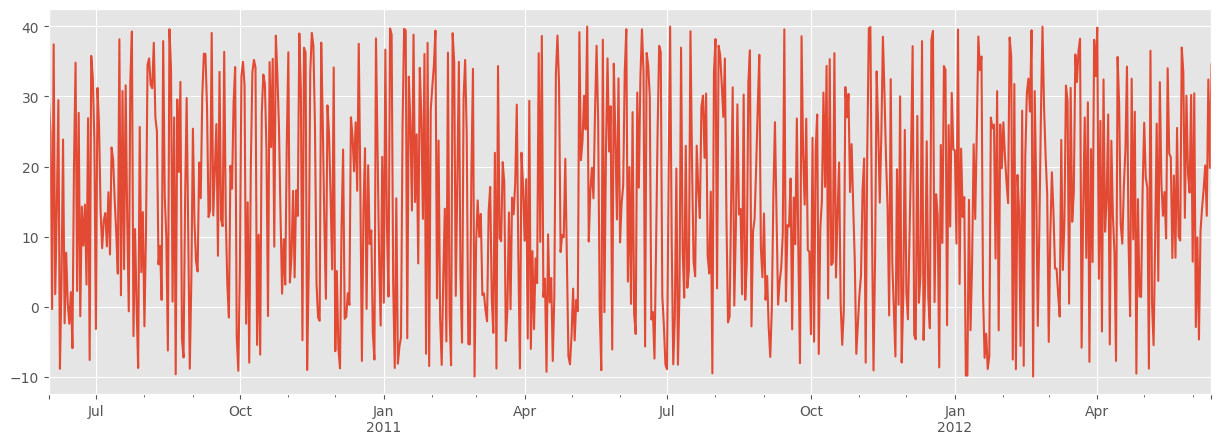

In [23]:
weather_mar2012[u"Temp (°C)"].plot(figsize=(15, 5))

In [24]:
asset.mock

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.588869,NaN,...,NaN,32.473788,NaN,73.208492,NaN,NaN,NaN,NaN,NaN,"Freezing Drizzle,Fog"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.736200,NaN,...,NaN,21.617652,NaN,86.238947,NaN,NaN,NaN,NaN,NaN,"Thunderstorms,Rain,Fog"
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.340567,NaN,...,NaN,12.842141,NaN,90.090385,NaN,NaN,NaN,NaN,NaN,"Freezing Drizzle,Snow"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.426496,NaN,...,NaN,10.395915,NaN,91.265378,NaN,NaN,NaN,NaN,NaN,Freezing Rain
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.803470,NaN,...,NaN,29.879912,NaN,76.958521,NaN,NaN,NaN,NaN,NaN,Snow Pellets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.156640,NaN,...,NaN,23.372752,NaN,63.937480,NaN,NaN,NaN,NaN,NaN,Thunderstorms
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.969319,NaN,...,NaN,19.181779,NaN,95.659244,NaN,NaN,NaN,NaN,NaN,Rain
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.408835,NaN,...,NaN,37.176449,NaN,57.719248,NaN,NaN,NaN,NaN,NaN,Snow Showers
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.791492,NaN,...,NaN,16.252349,NaN,63.797674,NaN,NaN,NaN,NaN,NaN,"Snow Showers,Fog"


In [25]:
# weather_mar2012.columns = [
#     u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
#     u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
#     u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
#     u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
#     u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
#     u'Wind Chill Flag', u'Weather']

In [26]:
# weather[u"Temp (C)"].plot(figsize=(15, 5))

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with dropna.

The argument axis=1 to dropna means "drop columns", not rows", and how='any' means "drop the column if any value is null".

This is much better now -- we only have columns with real data.

In [27]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,29.588869,94,6,32.473788,73.208492,"Freezing Drizzle,Fog"
2010-06-02,24.736200,98,16,21.617652,86.238947,"Thunderstorms,Rain,Fog"
2010-06-03,-0.340567,87,29,12.842141,90.090385,"Freezing Drizzle,Snow"
2010-06-04,37.426496,64,5,10.395915,91.265378,Freezing Rain
2010-06-05,1.803470,92,23,29.879912,76.958521,Snow Pellets


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The axis=1 argument means "Drop columns", like before. The default for operations like dropna and drop is always to operate on rows.

In [28]:
# weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
# weather_mar2012[:5]

Awesome! We now only have the relevant columns, and it's much more manageable.



## Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method NDFrame.head of             Temp (°C)
2010-06-01  29.588869
2010-06-02  24.736200
2010-06-03  -0.340567
2010-06-04  37.426496
2010-06-05   1.803470
...               ...
2012-06-09  20.156640
2012-06-10  12.969319
2012-06-11  32.408835
2012-06-12  19.791492
2012-06-13  34.565936

[744 rows x 1 columns]>


<AxesSubplot: xlabel='Hour'>

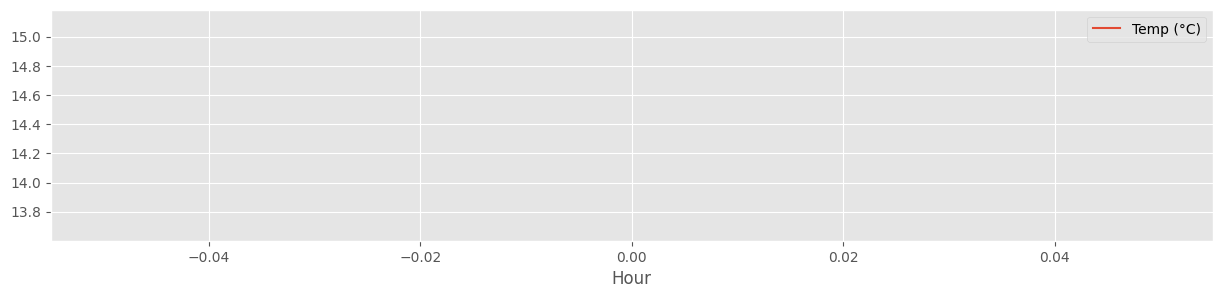

In [29]:
temperatures = weather_mar2012[[u'Temp (°C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

## Getting the whole year of data


Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month.

I noticed that there's an irritating bug where when I ask for January, it gives me data for the previous year, so we'll fix that too. [no, really. You can check =)]

In [30]:
def download_weather_month(year=2012, month=1):
    url = url_template.format(year=year, month=month)
    asset = ds.assets[url]
    weather_data = asset.mock
    weather_data = weather_data.dropna(axis=1)
    return weather_data

We can test that this function does the right thing:



In [31]:
download_weather_month(2012, 1)[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,14.407992,64,19,10.512538,86.970500,Haze
2010-06-02,26.640670,70,5,35.750307,58.487654,"Rain Showers,Snow Showers"
2010-06-03,26.186649,87,11,30.851681,51.092714,"Rain,Snow,Ice Pellets"
2010-06-04,23.405224,73,1,21.630214,83.271441,"Drizzle,Fog"
2010-06-05,5.797354,76,16,35.934774,72.483709,"Snow,Blowing Snow"


Now we can get all the months at once. This will take a little while to run.



In [32]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using pd.concat. And now we have the whole year's data!

In [33]:
data_by_month[0]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,14.407992,64,19,10.512538,86.970500,Haze
2010-06-02,26.640670,70,5,35.750307,58.487654,"Rain Showers,Snow Showers"
2010-06-03,26.186649,87,11,30.851681,51.092714,"Rain,Snow,Ice Pellets"
2010-06-04,23.405224,73,1,21.630214,83.271441,"Drizzle,Fog"
2010-06-05,5.797354,76,16,35.934774,72.483709,"Snow,Blowing Snow"
...,...,...,...,...,...,...
2012-06-09,37.093720,85,13,1.565702,52.821118,"Rain,Fog"
2012-06-10,1.265477,77,15,13.130591,95.237984,"Rain,Haze"
2012-06-11,7.009407,52,14,11.270577,71.516308,Mostly Cloudy
2012-06-12,32.417616,55,11,32.842659,65.128646,"Moderate Snow,Blowing Snow"


In [34]:
weather_2012 = pd.concat(data_by_month)

In [35]:
weather_2012

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,14.407992,64,19,10.512538,86.970500,Haze
2010-06-02,26.640670,70,5,35.750307,58.487654,"Rain Showers,Snow Showers"
2010-06-03,26.186649,87,11,30.851681,51.092714,"Rain,Snow,Ice Pellets"
2010-06-04,23.405224,73,1,21.630214,83.271441,"Drizzle,Fog"
2010-06-05,5.797354,76,16,35.934774,72.483709,"Snow,Blowing Snow"
...,...,...,...,...,...,...
2012-06-09,32.087538,65,11,17.287559,87.527471,"Snow,Ice Pellets"
2012-06-10,13.160112,87,11,21.133090,68.961058,"Freezing Drizzle,Fog"
2012-06-11,-1.818637,65,19,26.412487,64.169142,Mainly Clear
2012-06-12,14.827653,66,5,18.060180,99.528681,Haze


## Putting it together

Now we want to request the full code execution.

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing sum to max, numpy.median, or any other function you like.

In [36]:
@sy.syft_function(input_policy=sy.ExactMatch(month1df=ds.assets["weather1"], month2df=ds.assets["weather2"]),
                  output_policy=sy.SingleExecutionExactOutput())
def get_2012_weather(month1df, month2df):
    import pandas as pd
    month_dfs = [month1df, month2df]
    month_dfs = [x.dropna(axis=1) for x in month_dfs]
    weather_2012 = pd.concat(month_dfs)
    return weather_2012

Request code execution

In [37]:
req = guest_domain_client.api.services.code.request_code_execution(get_2012_weather)

In [38]:
submitted_code = guest_domain_client.code[0]

In [39]:
assert guest_domain_client.api.services.code.get_all()

Create and submit project

In [40]:
new_project = sy.Project(name="Pandas Chapter 5",
                         description="Hi, get all weather data for 2012")

In [41]:
new_project.add_request(obj=submitted_code, permission=sy.UserCodeStatus.EXECUTE)

In [42]:
guest_domain_client.submit_project(new_project)

<class 'syft.service.response.SyftSuccess'>: Project Submitted

# Data owner: execute syft function

In [43]:
from syft import MessageStatus

In [44]:
root_domain_client = node.login(email="info@openmined.org", password="changethis")

## Get messages

In [45]:
messages = root_domain_client.api.services.messages.get_all_for_status(MessageStatus.UNDELIVERED)

In [46]:
messages

,type,id,subject,status,created_at,linked_obj
0,syft.service.message.messages.Message,51a89debd66a46bca86d8f57845957da,Approval Request,MessageStatus.UNDELIVERED,2023-05-16 08:56:00,<<class 'syft.service.request.request.Request'...
1,syft.service.message.messages.Message,1eb26cc52f6940dd924f8117d6fd0783,Project Approval,MessageStatus.UNDELIVERED,2023-05-16 08:56:03,<<class 'syft.service.project.project.Project'...


In [47]:
project_message = [x for x in messages if issubclass(x.linked_obj.object_type, Project)][0]

In [48]:
request = project_message.link.requests[0]
func = request.changes[0].link
op = func.output_policy_type

In [49]:
func

```python
class UserCode:
  id: str = 90506e870ac74184a3c0aa29ef20be5e
  node_uid: str = 7675ef0eb0f1449f9eb224ea0a4e6d45
  user_verify_key: str = 7d625a611785618c141c768e40198ee5cfe0a846f8c08e906eebeba1306dcb90
  raw_code: str = "@sy.syft_function(input_policy=sy.ExactMatch(month1df=ds.assets["weather1"], month2df=ds.assets["weather2"]),
                  output_policy=sy.SingleExecutionExactOutput())
def get_2012_weather(month1df, month2df):
    import pandas as pd
    month_dfs = [month1df, month2df]
    month_dfs = [x.dropna(axis=1) for x in month_dfs]
    weather_2012 = pd.concat(month_dfs)
    return weather_2012
"
  input_policy_type: str = <class 'syft.service.policy.policy.ExactMatch'>
  input_policy_init_kwargs: str = {NodeView(node_name='pandas-test-domain-5', verify_key=da9e39867ce882e25bfb940513fa9beae5078382899f45246c4d2485a89f6a3a): {'month1df': <UID: 5f35cab325604c10ac693aff0df75ccb>, 'month2df': <UID: a7654d7863844c69b1fc355ae3d57c5b>}}
  input_policy_state: str = b''
  output_policy_type: str = <class 'syft.service.policy.policy.OutputPolicyExecuteOnce'>
  output_policy_init_kwargs: str = {}
  output_policy_state: str = b''
  parsed_code: str = "def user_func_get_2012_weather_7d625a611785618c141c768e40198ee5cfe0a846f8c08e906eebeba1306dcb90_aa72ee790fbfc5659f07c56a4745f6912732e6ba459c2bba422aca1516024162(month1df, month2df):

    def get_2012_weather(month1df, month2df):
        import pandas as pd
        month_dfs = [month1df, month2df]
        month_dfs = [x.dropna(axis=1) for x in month_dfs]
        weather_2012 = pd.concat(month_dfs)
        return weather_2012
    result = get_2012_weather(month1df=month1df, month2df=month2df)
    return result"
  service_func_name: str = "get_2012_weather"
  unique_func_name: str = "user_func_get_2012_weather_7d625a611785618c141c768e40198ee5cfe0a846f8c08e906eebeba1306dcb90_aa72ee790fbfc5659f07c56a4745f6912732e6ba459c2bba422aca1516024162"
  user_unique_func_name: str = "user_func_get_2012_weather_7d625a611785618c141c768e40198ee5cfe0a846f8c08e906eebeba1306dcb90"
  code_hash: str = "aa72ee790fbfc5659f07c56a4745f6912732e6ba459c2bba422aca1516024162"
  signature: str = (month1df, month2df)
  status: str = {NodeView(node_name='pandas-test-domain-5', verify_key=da9e39867ce882e25bfb940513fa9beae5078382899f45246c4d2485a89f6a3a): <UserCodeStatus.SUBMITTED: 'submitted'>}
  input_kwargs: str = ['month1df', 'month2df']
  enclave_metadata: str = None

```

In [50]:
get_col_user_function = func.unsafe_function

In [51]:
real_data1, real_data2 = root_domain_client.datasets[-1].assets["weather1"].data, root_domain_client.datasets[-1].assets["weather2"].data

In [52]:
real_data1

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,00:00,-1.8,NaN,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,01:00,-1.8,NaN,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,02:00,-1.8,NaN,...,NaN,4.0,NaN,101.26,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,03:00,-1.5,NaN,...,NaN,4.0,NaN,101.27,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,04:00,-1.5,NaN,...,NaN,4.8,NaN,101.23,NaN,NaN,NaN,-4.0,NaN,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,19:00,-7.7,NaN,...,NaN,1.6,NaN,101.14,NaN,NaN,NaN,-15.0,NaN,Snow
2012-01-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,20:00,-7.4,NaN,...,NaN,1.6,NaN,101.09,NaN,NaN,NaN,-15.0,NaN,Snow
2012-01-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,21:00,-7.1,NaN,...,NaN,12.9,NaN,101.02,NaN,NaN,NaN,-14.0,NaN,Cloudy


In [53]:
real_result = get_col_user_function(month1df=real_data1, month2df=real_data2)

In [54]:
len(real_data1) + len(real_data2) == len(real_result)

True

In [55]:
result = request.accept_by_depositing_result(real_result)
result
assert isinstance(result, sy.SyftSuccess)

# Data scientist: fetch result

In [58]:

guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [59]:
asset1, asset2 = guest_client.datasets[0].assets["weather1"], guest_client.datasets[0].assets["weather2"]

In [60]:
guest_client.api.services.code[0].status

{NodeView(node_name='pandas-test-domain-5', verify_key=da9e39867ce882e25bfb940513fa9beae5078382899f45246c4d2485a89f6a3a): <UserCodeStatus.EXECUTE: 'execute'>}

In [61]:
real_result = guest_client.api.services.code.get_2012_weather(month1df=asset1, month2df=asset2)

In [62]:
weather_2012 = real_result

In [63]:
len(weather_2012)

1440

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [64]:
weather_2012.to_csv('/tmp/weather_2012.csv');

And we're done!